# EDA

In [22]:
DATA_PATH = "data/"

In [23]:
%pip install pyarrow pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# read parquet data
X_t0 = pd.read_parquet(DATA_PATH + "X_t0.parquet")
y_t0 = pd.read_parquet(DATA_PATH + "y_t0.parquet")

df_t0 = pd.concat([X_t0, y_t0], axis=1)
df_t0.head()

borrow_block_number  borrow_timestamp  \
0              7711117      1.557197e+09   
1              7711123      1.557197e+09   
2              7711126      1.557197e+09   
3              7711672      1.557205e+09   
4              7712572      1.557217e+09   

                               wallet_address  first_tx_timestamp  \
0  0x502cb8985b2c92a8d4bf309cdaa89de9be442708        1.537224e+09   
1  0x502cb8985b2c92a8d4bf309cdaa89de9be442708        1.537224e+09   
2  0x502cb8985b2c92a8d4bf309cdaa89de9be442708        1.537224e+09   
3  0xa7ff0d561cd15ed525e31bbe0af3fe34ac2059f6        1.557191e+09   
4  0xbd9ed130a53cfafcf81502e4d35329a6c4d53410        1.557217e+09   

   last_tx_timestamp  wallet_age  incoming_tx_count  outgoing_tx_count  \
0       1.557197e+09  19973049.0                199                438   
1       1.557197e+09  19973188.0                200                439   
2       1.557197e+09  19973238.0                201                440   
3       1.557198e+09     13922.0                  8                 56   
4       1.557217e+09       264.0                  2                  3   

   net_incoming_tx_count  total_gas_paid_eth  ...  market_max_drawdown_365d  \
0                   -239            0.397391  ...                 -0.895911   
1                   -239            0.399063  ...                 -0.895911   
2                   -239            0.400895  ...                 -0.895911   
3                    -48            0.604001  ...                 -0.895911   
4                     -1            0.003008  ...                 -0.895911   

   market_natr  market_plus_di  market_plus_dm  market_ppo  market_rocp  \
0     4.479356       33.216622       33.415526   -2.370346     0.104294   
1     4.479356       33.216622       33.415526   -2.370346     0.104294   
2     4.479356       33.216622       33.415526   -2.370346     0.104294   
3     4.479356       33.216622       33.415526   -2.370346     0.104294   
4     4.479356       33.216622       33.415526   -2.370346     0.104294   

   market_rocr  unique_borrow_protocol_count  unique_lending_protocol_count  \
0     1.104294                             0                              1   
1     1.104294                             1                              1   
2     1.104294                             1                              1   
3     1.104294                             0                              1   
4     1.104294                             0                              1   

   target  
0       1  
1       1  
2       1  
3       0  
4       0  

[5 rows x 78 columns]

# Exploración de datos

In [26]:
df_t0.columns

Index(['borrow_block_number', 'borrow_timestamp', 'wallet_address',
       'first_tx_timestamp', 'last_tx_timestamp', 'wallet_age',
       'incoming_tx_count', 'outgoing_tx_count', 'net_incoming_tx_count',
       'total_gas_paid_eth', 'avg_gas_paid_per_tx_eth', 'risky_tx_count',
       'risky_unique_contract_count', 'risky_first_tx_timestamp',
       'risky_last_tx_timestamp', 'risky_first_last_tx_timestamp_diff',
       'risky_sum_outgoing_amount_eth', 'outgoing_tx_sum_eth',
       'incoming_tx_sum_eth', 'outgoing_tx_avg_eth', 'incoming_tx_avg_eth',
       'max_eth_ever', 'min_eth_ever', 'total_balance_eth', 'risk_factor',
       'total_collateral_eth', 'total_collateral_avg_eth',
       'total_available_borrows_eth', 'total_available_borrows_avg_eth',
       'avg_weighted_risk_factor', 'risk_factor_above_threshold_daily_count',
       'avg_risk_factor', 'max_risk_factor', 'borrow_amount_sum_eth',
       'borrow_amount_avg_eth', 'borrow_count', 'repay_amount_sum_eth',
       'repay_am

### **Datos generales del wallet (monedero)**
- **`borrow_block_number`**: Número del bloque en el que ocurrió el préstamo más reciente asociado al monedero.
- **`borrow_timestamp`**: Marca de tiempo (timestamp) del préstamo más reciente.
- **`wallet_address`**: Dirección del monedero que identifica al usuario.
- **`first_tx_timestamp`**: Timestamp de la primera transacción registrada para este monedero.
- **`last_tx_timestamp`**: Timestamp de la última transacción registrada.
- **`wallet_age`**: Tiempo total desde la primera transacción hasta la fecha actual, generalmente en días o meses.

### **Estadísticas de transacciones**
- **`incoming_tx_count`**: Número total de transacciones entrantes al monedero.
- **`outgoing_tx_count`**: Número total de transacciones salientes desde el monedero.
- **`net_incoming_tx_count`**: Diferencia entre las transacciones entrantes y salientes.
- **`total_gas_paid_eth`**: Cantidad total de gas pagado en ETH por todas las transacciones.
- **`avg_gas_paid_per_tx_eth`**: Promedio de gas pagado por transacción, expresado en ETH.

### **Datos sobre transacciones riesgosas**
- **`risky_tx_count`**: Número de transacciones clasificadas como riesgosas.
- **`risky_unique_contract_count`**: Número de contratos únicos involucrados en transacciones riesgosas.
- **`risky_first_tx_timestamp`**: Timestamp de la primera transacción riesgosa.
- **`risky_last_tx_timestamp`**: Timestamp de la última transacción riesgosa.
- **`risky_first_last_tx_timestamp_diff`**: Diferencia temporal entre la primera y la última transacción riesgosa.
- **`risky_sum_outgoing_amount_eth`**: Suma de ETH enviados en transacciones riesgosas.

### **Estadísticas de ETH (Ether) en el monedero**
- **`outgoing_tx_sum_eth`**: Suma total de ETH enviados en todas las transacciones salientes.
- **`incoming_tx_sum_eth`**: Suma total de ETH recibidos en todas las transacciones entrantes.
- **`outgoing_tx_avg_eth`**: Promedio de ETH enviados por transacción saliente.
- **`incoming_tx_avg_eth`**: Promedio de ETH recibidos por transacción entrante.
- **`max_eth_ever`**: Máximo balance de ETH alcanzado en el monedero.
- **`min_eth_ever`**: Mínimo balance de ETH registrado en el monedero.
- **`total_balance_eth`**: Balance actual del monedero en ETH.
- **`risk_factor`**: Indicador del nivel de riesgo asociado al monedero, basado en algún modelo de análisis.

### **Estadísticas de préstamos y colaterales**
- **`total_collateral_eth`**: Suma total de ETH utilizados como colateral.
- **`total_collateral_avg_eth`**: Promedio de ETH usados como colateral por préstamo.
- **`total_available_borrows_eth`**: Monto total de ETH disponible para préstamo.
- **`total_available_borrows_avg_eth`**: Promedio de ETH disponibles para préstamo.
- **`avg_weighted_risk_factor`**: Factor de riesgo ponderado promedio.
- **`risk_factor_above_threshold_daily_count`**: Número de días en los que el factor de riesgo estuvo por encima de un umbral predefinido.
- **`avg_risk_factor`**: Promedio del factor de riesgo del monedero.
- **`max_risk_factor`**: Máximo valor del factor de riesgo registrado.
- **`borrow_amount_sum_eth`**: Suma total de ETH prestados.
- **`borrow_amount_avg_eth`**: Promedio de ETH prestados por transacción.
- **`borrow_count`**: Número total de transacciones de préstamo.
- **`repay_amount_sum_eth`**: Suma total de ETH devueltos.
- **`repay_amount_avg_eth`**: Promedio de ETH devueltos por transacción.
- **`repay_count`**: Número total de transacciones de devolución.
- **`borrow_repay_diff_eth`**: Diferencia entre ETH prestados y devueltos.

### **Estadísticas de depósitos y retiros**
- **`deposit_count`**: Número de transacciones de depósito realizadas.
- **`deposit_amount_sum_eth`**: Suma total de ETH depositados.
- **`time_since_first_deposit`**: Tiempo transcurrido desde el primer depósito.
- **`withdraw_amount_sum_eth`**: Suma total de ETH retirados.
- **`withdraw_deposit_diff_if_positive_eth`**: Diferencia positiva entre ETH retirados y depositados.
- **`liquidation_count`**: Número de veces que el monedero fue liquidado.
- **`time_since_last_liquidated`**: Tiempo transcurrido desde la última liquidación.
- **`liquidation_amount_sum_eth`**: Suma total de ETH liquidados.

### **Indicadores del mercado**
- **`market_adx`, `market_adxr`, `market_apo`, etc.**: Indicadores técnicos basados en análisis del mercado, como fuerza direccional (ADX), Momentum, osciladores (Aroon), volatilidad (ATR), fuerza relativa (CCI), entre otros. Estos se usan comúnmente para evaluar tendencias o comportamientos del mercado.

### **Estadísticas adicionales**
- **`unique_borrow_protocol_count`**: Número de protocolos de préstamos únicos utilizados.
- **`unique_lending_protocol_count`**: Número de protocolos de préstamos ofrecidos.
- **`target`**: Variable objetivo, posiblemente para un modelo de predicción (como riesgo de impago o clasificación).

## **Limpieza de los datos**

Primero removemos las columnas como identificadores

In [27]:
columns_to_drop = [
    'borrow_block_number',
    'wallet_address',
    'borrow_timestamp',
    'first_tx_timestamp',
    'last_tx_timestamp',
    'risky_first_tx_timestamp',
    'risky_last_tx_timestamp',
    'unique_borrow_protocol_count',
    'unique_lending_protocol_count',
]

df_t0_columns_dropped = df_t0.drop(columns=columns_to_drop, inplace=False)

df_t0_columns_dropped.shape

(44296, 69)

In [28]:
df_t0_columns_dropped.head()

wallet_age  incoming_tx_count  outgoing_tx_count  net_incoming_tx_count  \
0  19973049.0                199                438                   -239   
1  19973188.0                200                439                   -239   
2  19973238.0                201                440                   -239   
3     13922.0                  8                 56                    -48   
4       264.0                  2                  3                     -1   

   total_gas_paid_eth  avg_gas_paid_per_tx_eth  risky_tx_count  \
0            0.397391                 0.000981               0   
1            0.399063                 0.000983               0   
2            0.400895                 0.000985               0   
3            0.604001                 0.010786               0   
4            0.003008                 0.001003               0   

   risky_unique_contract_count  risky_first_last_tx_timestamp_diff  \
0                            0                                   0   
1                            0                                   0   
2                            0                                   0   
3                            0                                   0   
4                            0                                   0   

   risky_sum_outgoing_amount_eth  ...  market_macdsignal_macdfix  \
0                            0.0  ...                   1.163425   
1                            0.0  ...                   1.163425   
2                            0.0  ...                   1.163425   
3                            0.0  ...                   1.163425   
4                            0.0  ...                   1.163425   

   market_macdsignal  market_max_drawdown_365d  market_natr  market_plus_di  \
0           1.212219                 -0.895911     4.479356       33.216622   
1           1.212219                 -0.895911     4.479356       33.216622   
2           1.212219                 -0.895911     4.479356       33.216622   
3           1.212219                 -0.895911     4.479356       33.216622   
4           1.212219                 -0.895911     4.479356       33.216622   

   market_plus_dm  market_ppo  market_rocp  market_rocr  target  
0       33.415526   -2.370346     0.104294     1.104294       1  
1       33.415526   -2.370346     0.104294     1.104294       1  
2       33.415526   -2.370346     0.104294     1.104294       1  
3       33.415526   -2.370346     0.104294     1.104294       0  
4       33.415526   -2.370346     0.104294     1.104294       0  

[5 rows x 69 columns]

In [29]:
sum(df_t0_columns_dropped.isna().sum() > 0)

0

## **Análisis exploratorio de datos (EDA)**

In [30]:
df_t0_columns_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44296 entries, 0 to 44295
Data columns (total 69 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   wallet_age                               44296 non-null  float64
 1   incoming_tx_count                        44296 non-null  int64  
 2   outgoing_tx_count                        44296 non-null  int64  
 3   net_incoming_tx_count                    44296 non-null  int64  
 4   total_gas_paid_eth                       44296 non-null  float64
 5   avg_gas_paid_per_tx_eth                  44296 non-null  float64
 6   risky_tx_count                           44296 non-null  int64  
 7   risky_unique_contract_count              44296 non-null  int64  
 8   risky_first_last_tx_timestamp_diff       44296 non-null  int64  
 9   risky_sum_outgoing_amount_eth            44296 non-null  float64
 10  outgoing_tx_sum_eth                      44296

In [31]:
print(df_t0_columns_dropped.describe())

         wallet_age  incoming_tx_count  outgoing_tx_count  \
count  4.429600e+04       44296.000000       44296.000000   
mean   2.943773e+07         999.369514        1360.256231   
std    2.897753e+07        3065.153260        3936.526950   
min    1.370000e+02           1.000000           0.000000   
25%    3.641601e+06          34.000000          52.000000   
50%    1.900256e+07         134.000000         207.000000   
75%    5.196818e+07         471.000000         678.000000   
max    1.540836e+08       98747.000000       71087.000000   

       net_incoming_tx_count  total_gas_paid_eth  avg_gas_paid_per_tx_eth  \
count           44296.000000        44296.000000             44296.000000   
mean             -360.886717            2.717345                 0.002874   
std              2167.545039           13.380028                 0.008137   
min            -68013.000000            0.000000                 0.000000   
25%              -198.000000            0.076647                 

In [32]:
numeric_features = df_t0_columns_dropped.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df_t0_columns_dropped.select_dtypes(include=['object']).columns

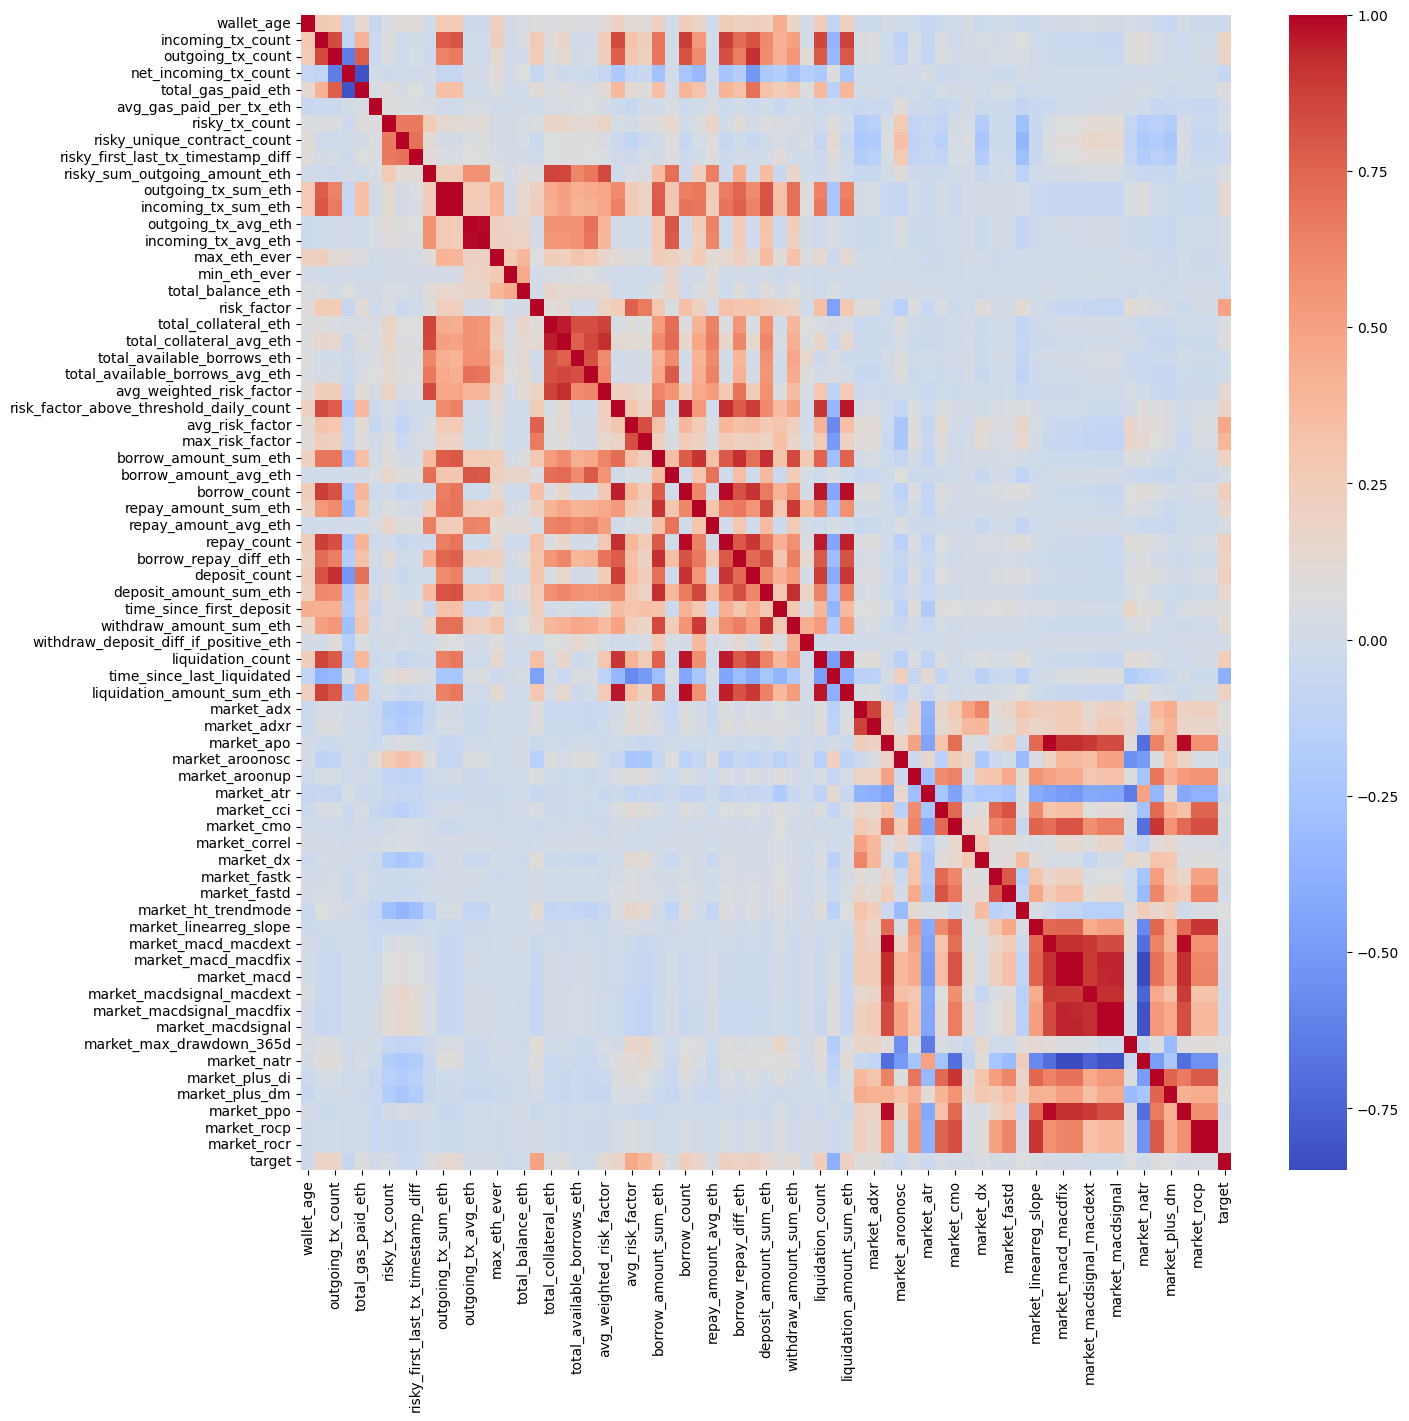

In [33]:
correlation_matrix = df_t0_columns_dropped[numeric_features].corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [34]:
correlations = df_t0_columns_dropped.corr(numeric_only=True)['target'].dropna()
correlations_sorted = correlations.abs().sort_values(ascending=False)
top_correlated_variables = correlations_sorted.index[1:11]  
print("10 variables más correlacionadas con 'target':")
print(correlations[top_correlated_variables])


10 variables más correlacionadas con 'target':
risk_factor                   0.498964
avg_risk_factor               0.467638
max_risk_factor               0.391738
time_since_last_liquidated   -0.389695
liquidation_count             0.244964
borrow_count                  0.229686
repay_count                   0.226921
deposit_count                 0.213277
liquidation_amount_sum_eth    0.198720
borrow_repay_diff_eth         0.194440
Name: target, dtype: float64


In [35]:
df_t0_columns_dropped.columns

Index(['wallet_age', 'incoming_tx_count', 'outgoing_tx_count',
       'net_incoming_tx_count', 'total_gas_paid_eth',
       'avg_gas_paid_per_tx_eth', 'risky_tx_count',
       'risky_unique_contract_count', 'risky_first_last_tx_timestamp_diff',
       'risky_sum_outgoing_amount_eth', 'outgoing_tx_sum_eth',
       'incoming_tx_sum_eth', 'outgoing_tx_avg_eth', 'incoming_tx_avg_eth',
       'max_eth_ever', 'min_eth_ever', 'total_balance_eth', 'risk_factor',
       'total_collateral_eth', 'total_collateral_avg_eth',
       'total_available_borrows_eth', 'total_available_borrows_avg_eth',
       'avg_weighted_risk_factor', 'risk_factor_above_threshold_daily_count',
       'avg_risk_factor', 'max_risk_factor', 'borrow_amount_sum_eth',
       'borrow_amount_avg_eth', 'borrow_count', 'repay_amount_sum_eth',
       'repay_amount_avg_eth', 'repay_count', 'borrow_repay_diff_eth',
       'deposit_count', 'deposit_amount_sum_eth', 'time_since_first_deposit',
       'withdraw_amount_sum_eth', 'withd

In [36]:
def find_correlated_attributes(df, threshold=0.9):
    corr_matrix = df.corr()
    correlated_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                correlated_pairs.append({
                    'Attribute 1': corr_matrix.columns[i],
                    'Attribute 2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    correlated_df = pd.DataFrame(correlated_pairs)
    
    return correlated_df

El objetivo de esto, es encontrar variables muy correlacionadas entre sí para evitar redundancia o no sé, es raro que estén muy correlacionadas entre sí

In [37]:
correlated_attributes = find_correlated_attributes(df_t0_columns_dropped) #con threshold=0.9, también hace sentido desde 0.7
correlated_attributes.head(50)

Attribute 1                              Attribute 2  \
0          incoming_tx_sum_eth                      outgoing_tx_sum_eth   
1          incoming_tx_avg_eth                      outgoing_tx_avg_eth   
2     total_collateral_avg_eth                     total_collateral_eth   
3     avg_weighted_risk_factor                 total_collateral_avg_eth   
4                 borrow_count  risk_factor_above_threshold_daily_count   
5         repay_amount_sum_eth                    borrow_amount_sum_eth   
6                  repay_count  risk_factor_above_threshold_daily_count   
7                  repay_count                             borrow_count   
8        borrow_repay_diff_eth                    borrow_amount_sum_eth   
9                deposit_count                        outgoing_tx_count   
10               deposit_count                             borrow_count   
11               deposit_count                              repay_count   
12      deposit_amount_sum_eth                    borrow_amount_sum_eth   
13     withdraw_amount_sum_eth                   deposit_amount_sum_eth   
14           liquidation_count  risk_factor_above_threshold_daily_count   
15           liquidation_count                             borrow_count   
16           liquidation_count                              repay_count   
17  liquidation_amount_sum_eth  risk_factor_above_threshold_daily_count   
18  liquidation_amount_sum_eth                             borrow_count   
19  liquidation_amount_sum_eth                              repay_count   
20  liquidation_amount_sum_eth                        liquidation_count   
21         market_macd_macdext                               market_apo   
22         market_macd_macdfix                               market_apo   
23         market_macd_macdfix                      market_macd_macdext   
24                 market_macd                               market_apo   
25                 market_macd                      market_macd_macdext   
26                 market_macd                      market_macd_macdfix   
27   market_macdsignal_macdfix                      market_macd_macdfix   
28   market_macdsignal_macdfix                              market_macd   
29   market_macdsignal_macdfix                market_macdsignal_macdext   
30           market_macdsignal                      market_macd_macdfix   
31           market_macdsignal                              market_macd   
32           market_macdsignal                market_macdsignal_macdext   
33           market_macdsignal                market_macdsignal_macdfix   
34              market_plus_di                               market_cmo   
35                  market_ppo                               market_apo   
36                  market_ppo                      market_macd_macdext   
37                  market_ppo                      market_macd_macdfix   
38                  market_ppo                              market_macd   
39                 market_rocp                   market_linearreg_slope   
40                 market_rocr                   market_linearreg_slope   
41                 market_rocr                              market_rocp   

    Correlation  
0      0.998194  
1      0.992764  
2      0.959850  
3      0.926625  
4      0.953996  
5      0.912627  
6      0.923316  
7      0.987751  
8      0.916482  
9      0.917758  
10     0.912546  
11     0.905519  
12     0.918563  
13     0.921489  
14     0.902936  
15     0.968597  
16     0.959278  
17     0.968803  
18     0.979483  
19     0.956222  
20     0.966998  
21     1.000000  
22     0.925915  
23     0.925915  
24     0.926141  
25     0.926141  
26     0.999987  
27     0.943040  
28     0.941426  
29     0.926906  
30     0.944392  
31     0.942796  
32     0.927254  
33     0.999990  
34     0.901125  
35     0.985932  
36     0.985932  
37     0.914676  
38     0.914851  
39     0.904510  
40     0.904510  
41     1.000000

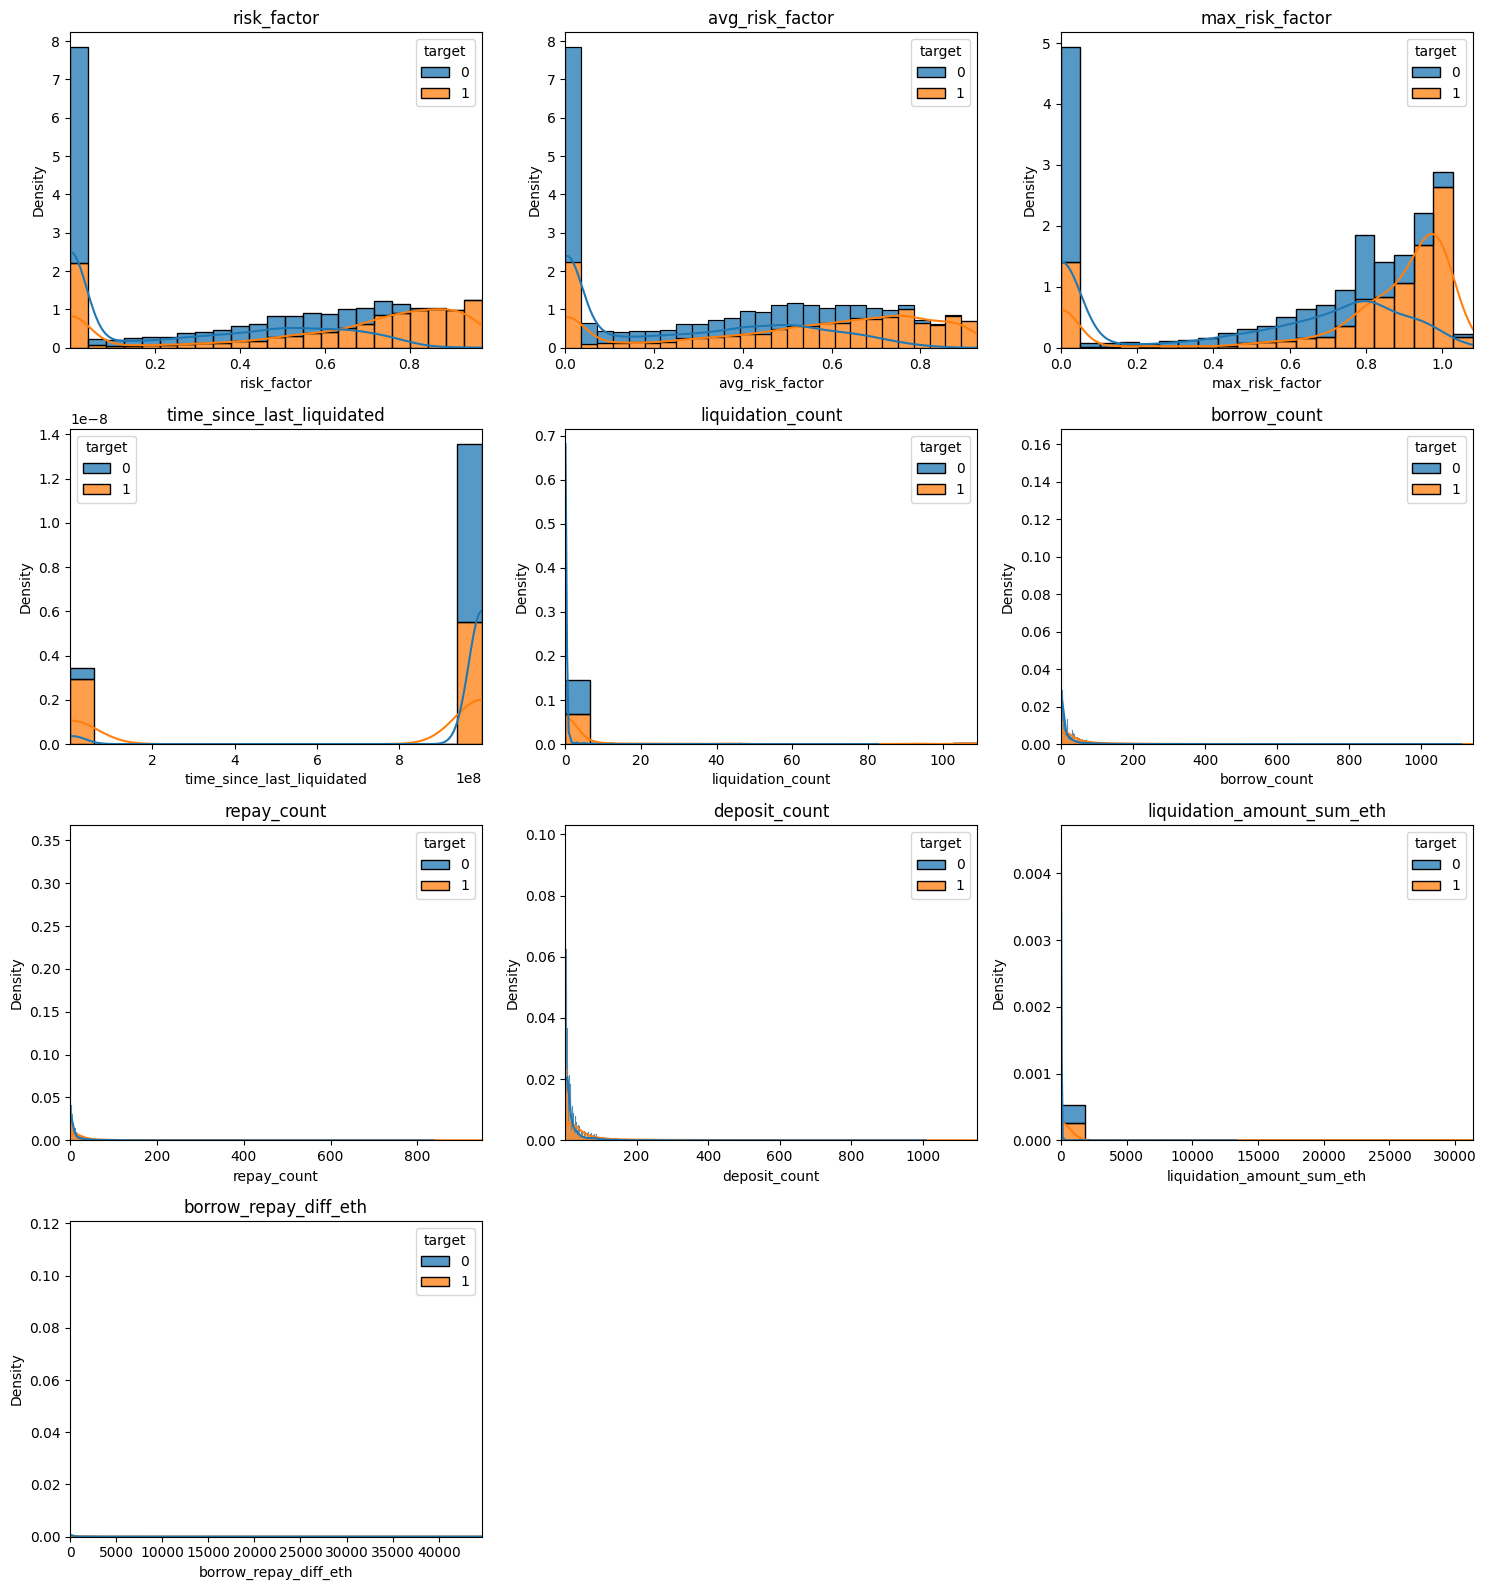

In [ ]:
def plot_distributions_grid_stacked(df, max_plots_per_row=3, hue=None, normalize=False, clip_percentiles=(1, 99)):
    """
    Plots a grid of histograms with stacked bars and overlaid KDE lines for each column in a DataFrame.
    Each plot has its own scale for both X and Y axes.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing the data to plot.
    - max_plots_per_row (int): Maximum number of plots per row.
    - hue (str): Column name to use for coloring the plots (optional).
    - normalize (bool): Whether to normalize histograms for comparison.
    - clip_percentiles (tuple): Percentiles to clip the data for better visualization.
    """
    # Calculate the grid dimensions
    num_columns = len(df.columns)
    if hue in df.columns:
        num_columns -= 1  # Exclude hue column from plotting
    
    num_rows = int(np.ceil(num_columns / max_plots_per_row))
    
    fig, axes = plt.subplots(num_rows, max_plots_per_row, figsize=(5 * max_plots_per_row, 4 * num_rows))
    axes = axes.flatten()  # Flatten to make indexing easier
    
    columns_to_plot = [col for col in df.columns if col != hue]
    
    # Plot each column
    for i, column in enumerate(columns_to_plot):
        ax = axes[i]
        # Clip data to remove outliers
        lower, upper = np.percentile(df[column], clip_percentiles)
        clipped_data = df[(df[column] >= lower) & (df[column] <= upper)]
        
        if hue and hue in df.columns:
            # Plot stacked histogram
            sns.histplot(data=clipped_data, x=column, hue=hue, kde=False, 
                         stat='density' if normalize else 'count', ax=ax, element="bars", multiple="stack")
            # Add overlaid KDE lines
            sns.kdeplot(data=clipped_data, x=column, hue=hue, ax=ax, common_norm=normalize, legend=False)
        else:
            sns.histplot(clipped_data[column], kde=True, stat='density' if normalize else 'count', ax=ax)
        
        ax.set_title(column)
        ax.set_xlim(lower, upper)  # Set x-axis limits to clipped range
    
    # Remove unused subplots
    for j in range(len(columns_to_plot), len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

to_plot_cols = top_correlated_variables.tolist() + ['target']
plot_distributions_grid_stacked(df_t0_columns_dropped[to_plot_cols], max_plots_per_row=3, hue='target', normalize=True)

### **Comparación con X de otros sets de datos**

In [43]:
X_t1_iter_1 = pd.read_parquet(DATA_PATH + "X_t1_old.parquet")

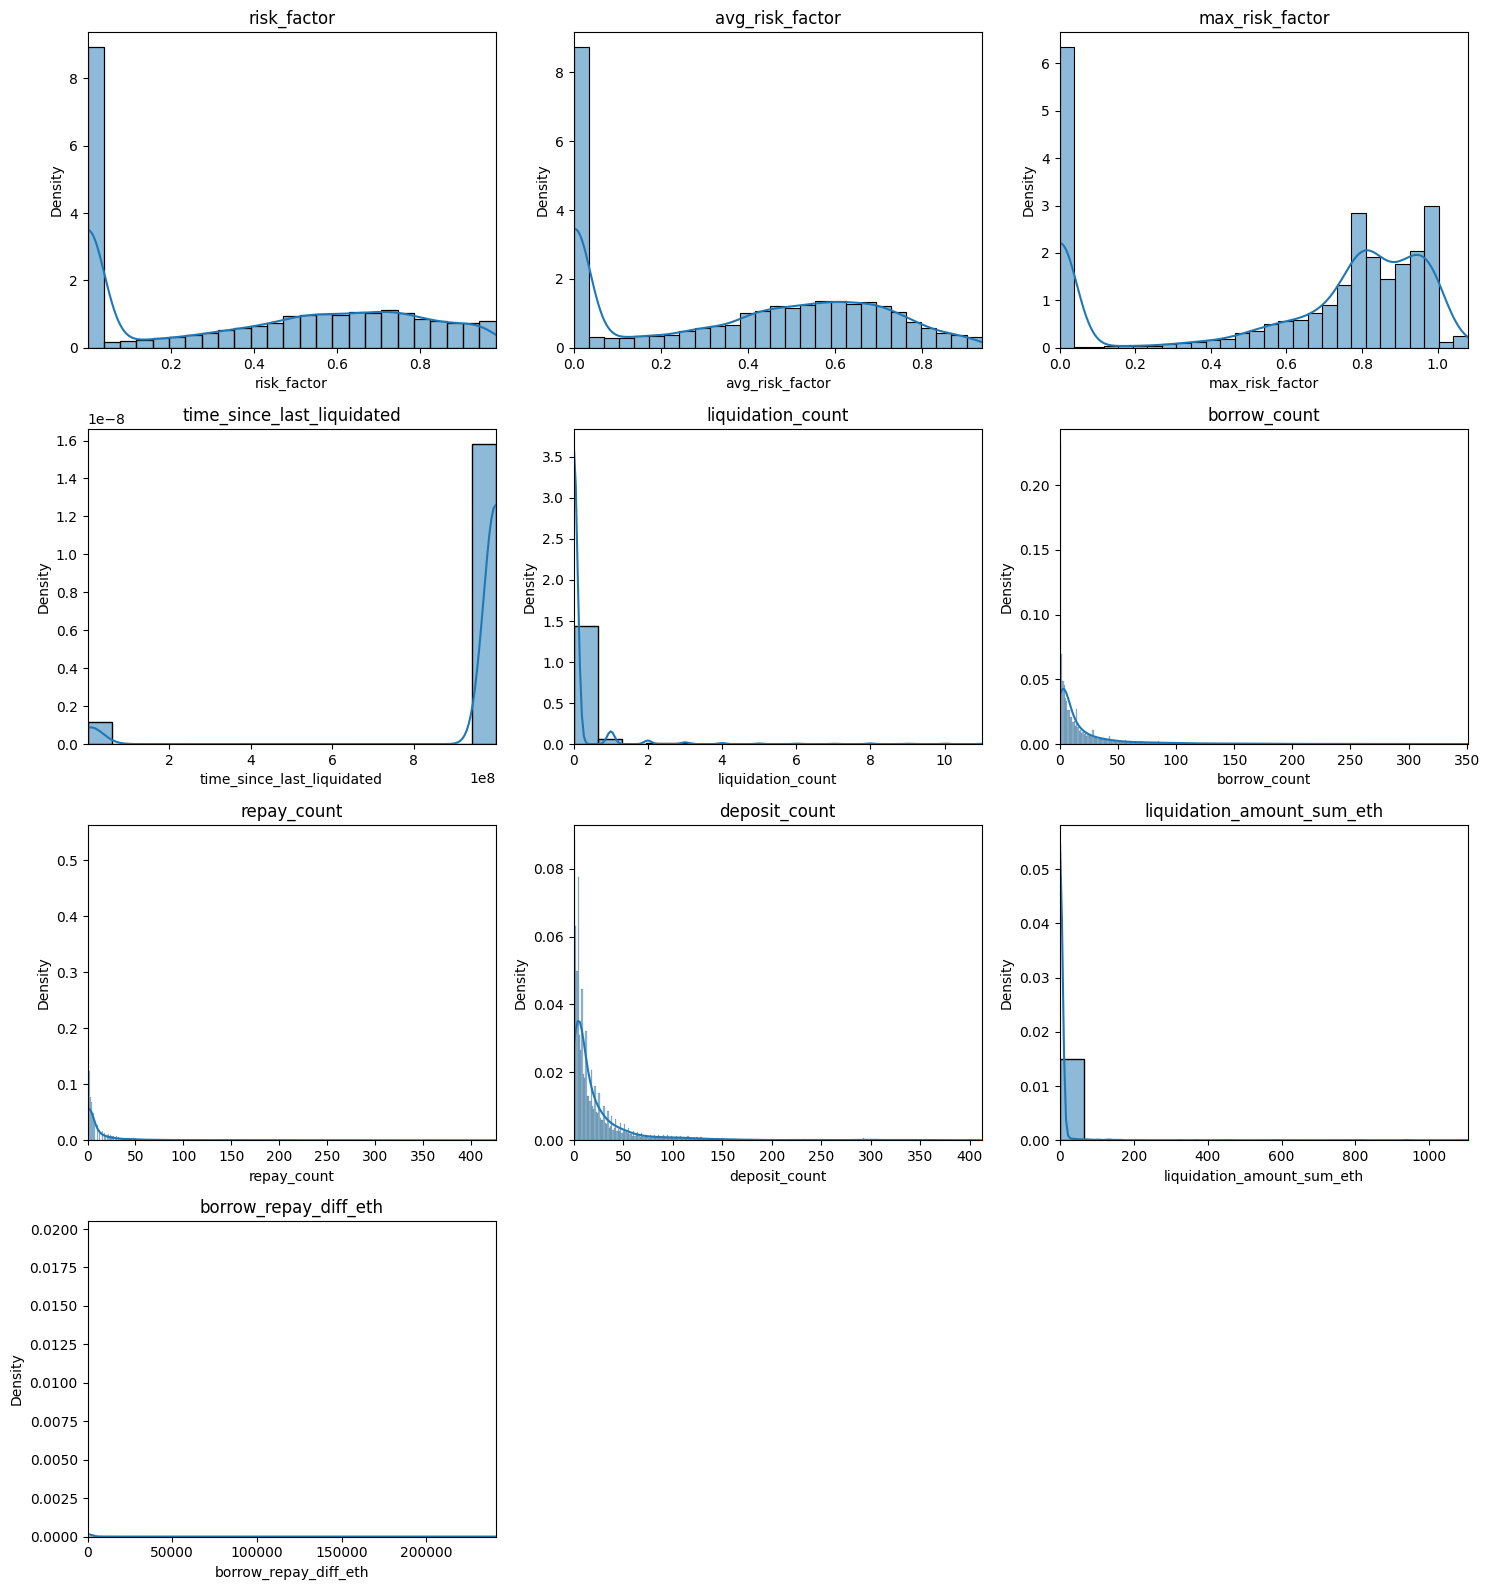

In [47]:
to_plot_cols_X_t1_iter_1 = top_correlated_variables.tolist()
plot_distributions_grid_stacked(X_t1_iter_1[to_plot_cols_X_t1_iter_1], max_plots_per_row=3, hue='target', normalize=True)

In [49]:
X_t1_iter_2 = pd.read_parquet(DATA_PATH + "X_t1_new.parquet")

In [ ]:
to_plot_cols_X_t1_iter_1 = top_correlated_variables.tolist()
plot_distributions_grid_stacked(X_t1_iter_1[to_plot_cols_X_t1_iter_1], max_plots_per_row=3, hue='target', normalize=True)

# **Entrenamiento de modelos de ML**

#### **División de los datos**

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_t0, y_t0, train_size=0.7, stratify=y_t0, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=0.5, stratify=y_temp, random_state=42)

In [131]:
X_train = pd.DataFrame(X_train, columns=X_t0.columns)
X_val = pd.DataFrame(X_val, columns=X_t0.columns)
X_test = pd.DataFrame(X_test, columns=X_t0.columns)

y_train = np.array(y_train).ravel()
y_val = np.array(y_val).ravel()
y_test = np.array(y_test).ravel()

In [132]:
X_train.shape, X_val.shape, X_test.shape

((31007, 77), (6644, 77), (6645, 77))

#### **Preparación de pipelines**

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features.drop('target')),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [134]:
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score

def train_model(
    model: BaseEstimator,
    X_train: pd.DataFrame, 
    y_train: pd.Series,
    X_val: pd.DataFrame, 
    y_val: pd.Series,
) -> Pipeline:
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipe.fit(X_train, y_train)
    
    y_train_pred = pipe.predict(X_train)
    y_val_pred = pipe.predict(X_val)
    
    print(f"Model to train: {model.__class__.__name__}")
    print(f"Train accuracy: {accuracy_score(y_train, y_train_pred)}")
    print(f"Validation accuracy: {accuracy_score(y_val, y_val_pred)}")
    
    return pipe

#### **DecisionTreeClassifier**

Model to train: DecisionTreeClassifier
Train accuracy: 1.0
Validation accuracy: 0.8252558699578567


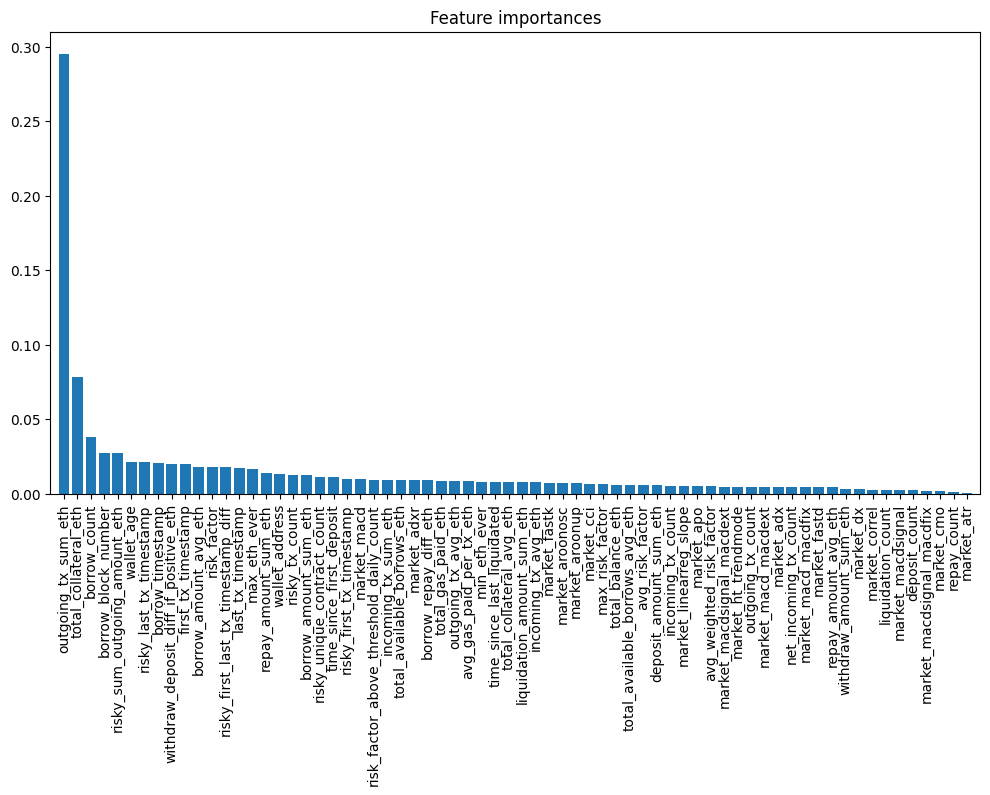

In [143]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_pipe = train_model(DecisionTreeClassifier(), X_train, y_train, X_val, y_val)
# get the tree
tree = decision_tree_pipe.named_steps['classifier']
# get the feature importances
importances = tree.feature_importances_
# get the feature names
feature_names = X_train.columns
# sort them
indices = np.argsort(importances)[::-1]

# plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
preprocessed_X_train = decision_tree_pipe.named_steps['preprocessor'].transform(X_train)
plt.bar(range(preprocessed_X_train.shape[1]), importances[indices],
        align="center")

plt.xticks(range(preprocessed_X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, preprocessed_X_train.shape[1]])
plt.show()

#### **RandomForestClassifier**

Model to train: RandomForestClassifier
Train accuracy: 1.0
Validation accuracy: 0.8962974111980735


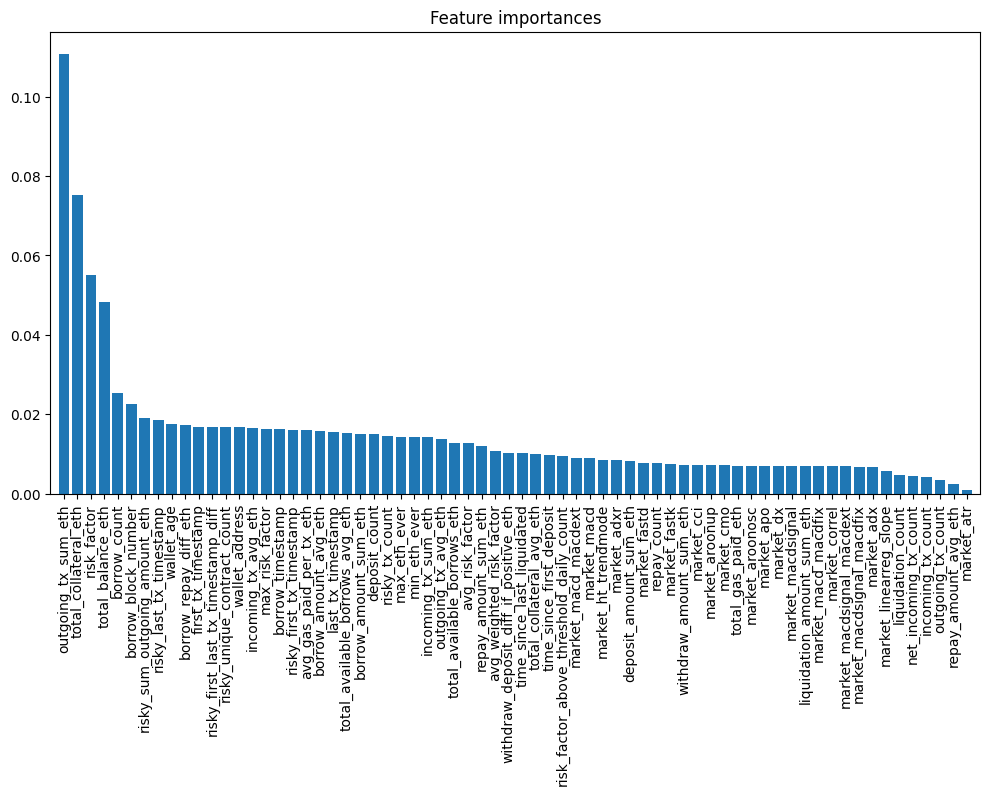

In [144]:
from sklearn.ensemble import RandomForestClassifier
random_forest_pipe = train_model(RandomForestClassifier(), X_train, y_train, X_val, y_val)
# get the tree
tree = random_forest_pipe.named_steps['classifier']
# get the feature importances
importances = tree.feature_importances_
# get the feature names
feature_names = X_train.columns
# sort them
indices = np.argsort(importances)[::-1]

# plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature importances")
preprocessed_X_train = random_forest_pipe.named_steps['preprocessor'].transform(X_train)
plt.bar(range(preprocessed_X_train.shape[1]), importances[indices],
        align="center")

plt.xticks(range(preprocessed_X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, preprocessed_X_train.shape[1]])
plt.show()

#### **XGBoost**

Model to train: XGBClassifier
Train accuracy: 0.9512368174928242
Validation accuracy: 0.885009030704395


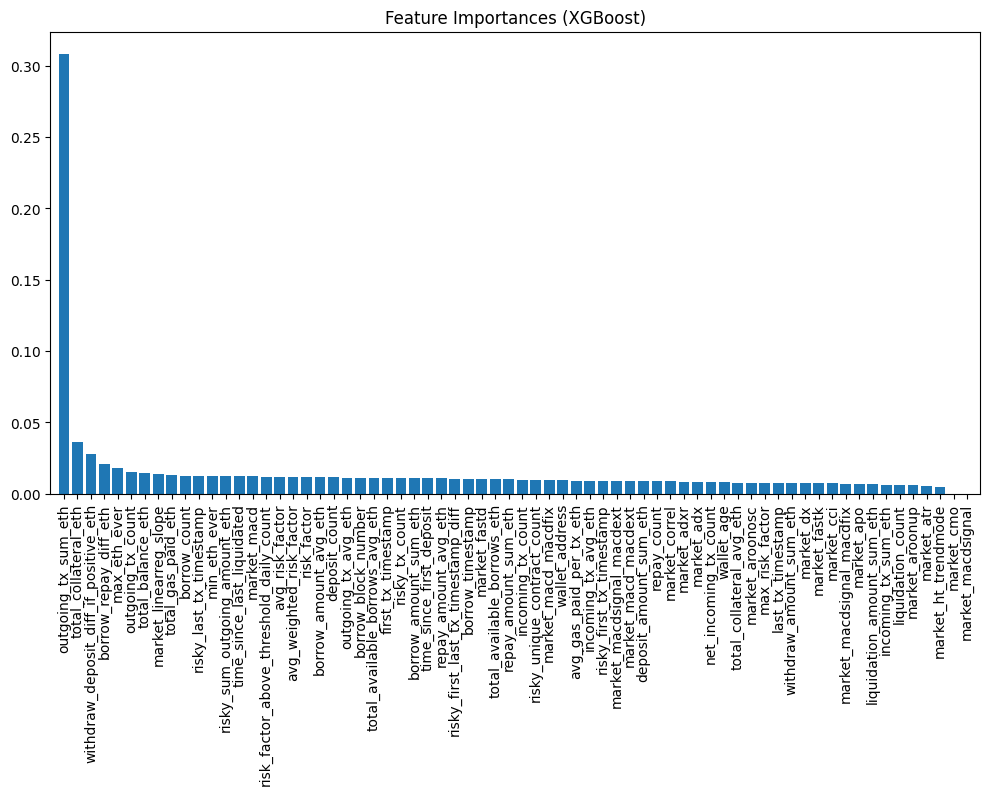

In [145]:
from xgboost import XGBClassifier

# Entrenar el modelo con XGBoost
xgboost_pipe = train_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), 
                           X_train, y_train, X_val, y_val)

# Obtener el modelo entrenado
xgb_model = xgboost_pipe.named_steps['classifier']

# Obtener importancias de características
importances = xgb_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

# Graficar la importancia de las características
plt.figure(figsize=(12, 6))
plt.title("Feature Importances (XGBoost)")
preprocessed_X_train = xgboost_pipe.named_steps['preprocessor'].transform(X_train)
plt.bar(range(preprocessed_X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(preprocessed_X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, preprocessed_X_train.shape[1]])
plt.show()


#### **LGBoost**

[LightGBM] [Info] Number of positive: 15859, number of negative: 15148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023346 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15502
[LightGBM] [Info] Number of data points in the train set: 31007, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511465 -> initscore=0.045869
[LightGBM] [Info] Start training from score 0.045869
Model to train: LGBMClassifier
Train accuracy: 0.8817363821072661
Validation accuracy: 0.8600240818783865


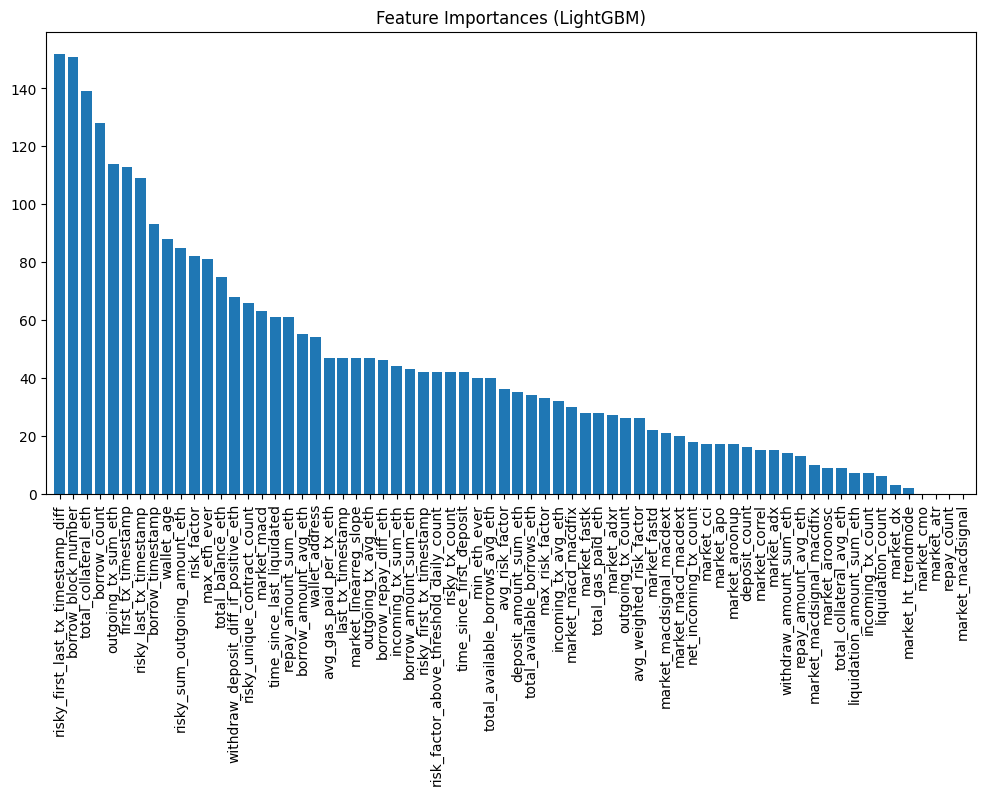

In [ ]:
from lightgbm import LGBMClassifier

# Entrenar el modelo con LightGBM
lightgbm_pipe = train_model(LGBMClassifier(), X_train, y_train, X_val, y_val)

# Obtener el modelo entrenado
lgb_model = lightgbm_pipe.named_steps['classifier']

# Obtener importancias de características
importances = lgb_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (LightGBM)")
preprocessed_X_train = lightgbm_pipe.named_steps['preprocessor'].transform(X_train)
plt.bar(range(preprocessed_X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(preprocessed_X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, preprocessed_X_train.shape[1]])
plt.show()

#### **CatBoost**

Model to train: CatBoostClassifier
Train accuracy: 0.9235656464669268
Validation accuracy: 0.8768813967489464


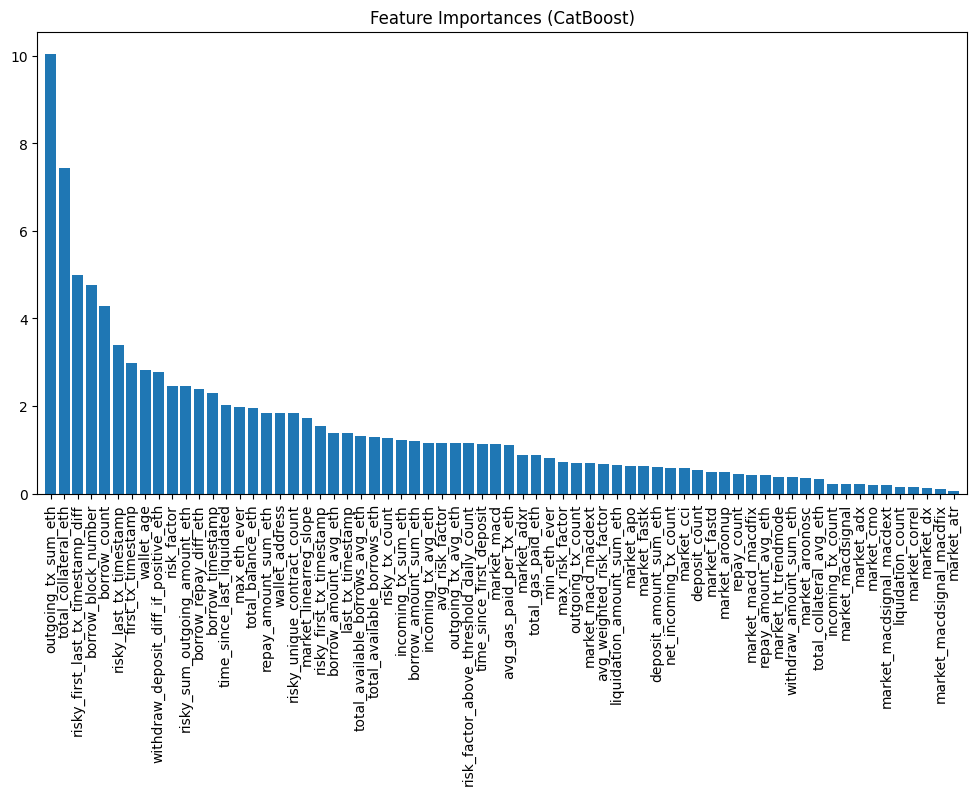

In [ ]:
from catboost import CatBoostClassifier

catboost_pipe = train_model(CatBoostClassifier(verbose=0), X_train, y_train, X_val, y_val)

cat_model = catboost_pipe.named_steps['classifier']

importances = cat_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (CatBoost)")
preprocessed_X_train = catboost_pipe.named_steps['preprocessor'].transform(X_train)
plt.bar(range(preprocessed_X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(preprocessed_X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.xlim([-1, preprocessed_X_train.shape[1]])
plt.show()

In [152]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
import numpy as np

X_train = X_train.drop(columns=['wallet_address'])
X_test = X_test.drop(columns=['wallet_address'])

def forward_feature_selection(X, y, model, scoring='accuracy', cv=5):
    selected_features = []
    remaining_features = list(X.columns)
    best_score = -np.inf

    while remaining_features:
        scores = []
        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_subset = X[current_features]
            score = cross_val_score(model, X_subset, y, scoring=scoring, cv=cv).mean()
            scores.append((score, feature))
        
        scores.sort(reverse=True, key=lambda x: x[0])
        best_current_score, best_feature = scores[0]

        if best_current_score > best_score:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_score = best_current_score
            print(f"Feature added: {best_feature}, New score: {best_current_score}")
        else:
            break

    return selected_features

lgb_model = lgb.LGBMClassifier(random_state=42, verbose=-1)

selected_features = forward_feature_selection(X_train, y_train, lgb_model, scoring='accuracy', cv=5)

print("\nCaracterísticas seleccionadas:")
print(selected_features)


Feature added: max_risk_factor, New score: 0.7478632270616598
Feature added: max_eth_ever, New score: 0.7909504770870246
Feature added: borrow_block_number, New score: 0.8132036052688552
Feature added: risk_factor, New score: 0.8234916027368857
Feature added: first_tx_timestamp, New score: 0.8341342100786712
Feature added: min_eth_ever, New score: 0.8398426391058104
Feature added: outgoing_tx_avg_eth, New score: 0.8431645383261721
Feature added: incoming_tx_sum_eth, New score: 0.8449384977644273
Feature added: total_available_borrows_avg_eth, New score: 0.8458735499537919
Feature added: wallet_age, New score: 0.8465186124030197
Feature added: risky_first_tx_timestamp, New score: 0.8478087112994903
Feature added: net_incoming_tx_count, New score: 0.8492922701662428
Feature added: time_since_first_deposit, New score: 0.8495500538475111
Feature added: incoming_tx_avg_eth, New score: 0.8499693410592511
Feature added: total_gas_paid_eth, New score: 0.8508078894807461

Características selecc

In [167]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

param_grid = {
    'num_leaves': [31, 40, 50],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'lambda_l1': [0, 0.1, 1],
    'lambda_l2': [0, 0.1, 1],
    'min_split_gain': [0, 0.1, 0.2],
    'min_child_weight': [1, 5, 10]
}

lgb_model = lgb.LGBMClassifier()
grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Info] Number of positive: 12687, number of negative: 12118
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 17085
[LightGBM] [Info] Number of data points in the train set: 24805, number of used features: 76
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.511469 -> initscore=0.045886
[LightGBM] [Info] Start training from score 0.045886
[LightGBM] [Warning] lambda_l1 is set=0, reg_

KeyboardInterrupt: 

In [ ]:
#el mejor q tenía era 0.99 train 0.90 en validation
best_lgbm = LGBMClassifier(**grid_search.best_params_)
best_lgbm_pipe = train_model(best_lgbm, X_train, y_train, X_val, y_val) 

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

models = [
    RandomForestClassifier(random_state=42, n_estimators=1000),
    RandomForestClassifier(random_state=42, n_estimators=1000, class_weight='balanced'),
    RandomForestClassifier(random_state=42, n_estimators=1000, class_weight='balanced_subsample'),
    #LogisticRegression(max_iter=1000),
    #SVC(),
    #MLPClassifier(max_iter=1000, random_state=42, verbose=True, learning_rate='adaptive', learning_rate_init=0.005)
]

for model in models:
    train_model(model, X_train, y_train, X_val, y_val)
    print()
    print()

Model to train: RandomForestClassifier
Train accuracy: 1.0
Validation accuracy: 0.8967489464178205


Model to train: RandomForestClassifier
Train accuracy: 1.0
Validation accuracy: 0.8968994581577363


Model to train: RandomForestClassifier
Train accuracy: 1.0
Validation accuracy: 0.8970499698976521




In [ ]:
%pip install mlflow

In [137]:
from pycaret.classification import *
import os

os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

exp1 = setup(data = df_t0, target = 'target', use_gpu=True, experiment_name='exp1')

ImportError: cannot import name '_print_elapsed_time' from 'sklearn.utils' (c:\Users\nicol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\__init__.py)

In [138]:
best_model = compare_models()

NameError: name 'compare_models' is not defined